# Fase 1: Exploración y Limpieza

### 1. Exploración Inicial:

- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores
nulos, atípicos o datos faltantes en las columnas relevantes.

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la
presencia de valores nulos y estadísticas básicas de las columnas involucradas.

- Une los dos conjuntos de datos de la forma más eficiente.

In [1]:
import pandas as pd
import numpy as np
import re
from word2number import w2n

In [2]:
#Configurar que pandas muestre todas las columnas y todas las filas del dataframe

pd.set_option('display.max_columns', None)

In [3]:
#Descargar los csv

df1 = pd.read_csv('Customer Flight Activity.csv', index_col = 0)
df2 = pd.read_csv('Customer Loyalty History.csv', index_col = 0)

EDA BÁSICO PARA ENTENDER LOS DATOS

In [4]:
# Función para el EDA

def eda_basico(df):

    print('🌷Ejemplo de datos del DF:')
    display(df.head(3))
    display(df.tail(3))
    display(df.sample(3))
    print('________________________________________________________________________________________________________')

    print('🌻Número de Filas:')
    display(df.shape[0])
    print('________________________________________________________________________________________________________')

    print('🌱Número de Columnas:')
    display(df.shape[1])
    print('________________________________________________________________________________________________________')

    print('🌼Información de la tabla:')
    display(df.info())
    print('________________________________________________________________________________________________________')

    print('🌑Nombre de las columnas:')
    display(df.columns)
    print('________________________________________________________________________________________________________')

    print('🍄Descripción de los datos numéricos:')
    display(df.describe().T)
    print('________________________________________________________________________________________________________')

    print('🌋Descripción de los datos no-numéricos:')
    non_numeric_cols = df.select_dtypes(include=['object', 'category', 'string']).columns
    if len(non_numeric_cols) > 0:
        display(df.describe(include=['object', 'category', 'string']).T)
    else:
        print('No hay columnas no-numéricas para describir.')
    print('________________________________________________________________________________________________________')

    print('🍂Saber si hay datos únicos:')
    display(df.nunique())
    print('________________________________________________________________________________________________________')

    print('🐖Que datos son nulos por columnas:')
    display(df.isnull().sum())
    print('________________________________________________________________________________________________________')

    print('🐲Filas duplicadas:')
    total_duplicados = df.duplicated().sum()
    if total_duplicados > 0:
        print(f'cantidad de duplicados: {total_duplicados}')
        print('Primeros duplicados')
        display(df[df.duplicated()].head(3))
    else:
        print('No hay duplicados')
    print('________________________________________________________________________________________________________')

In [ ]:
eda_basico(df1)

In [ ]:
eda_basico(df2)

- df1 (Customer Flight Analysis) no tiene nulos pero sí duplcados. Tratamos los duplicados antes del merge.
- df2 (Customer Loyalty Analysis) sí tiene nulos pero no duplicados. Los nulos los trabjamos después del merge.

In [7]:
# Trato los duplicados

print(f'Antes de eliminar duplicados, df1 tenía: {df1.shape[0]} filas')

df1 = df1.drop_duplicates()

print(f'Después de eliminar duplicados, df1 tiene: {df1.shape[0]} filas')

Antes de eliminar duplicados, df1 tenía: 405624 filas
Después de eliminar duplicados, df1 tiene: 176919 filas


In [8]:
# Uno los datos de ambos df

print(f'df1: {df1.shape[0]} filas, {df1.shape[1]} columnas')
print(f'df2: {df2.shape[0]} filas, {df2.shape[1]} columnas')

df = pd.merge(df1, df2, on='Loyalty Number', how='left')

print(f'Dataset final unido: {df.shape[0]} filas, {df.shape[1]} columnas')

df1: 176919 filas, 9 columnas
df2: 16737 filas, 15 columnas
Dataset final unido: 176919 filas, 24 columnas


### 2. Limpieza de Datos:

- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
estén completos.

- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
datos) para garantizar la adecuación de los datos para el análisis estadístico.

### Limpieza de datos

In [9]:
df.columns

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed', 'Country', 'Province', 'City',
       'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status',
       'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year',
       'Enrollment Month', 'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [10]:
# renombramos columnas: todo a minúsculas y reemplazamos los espacios por guión bajo

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
df.columns

Index(['year', 'month', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed', 'country', 'province', 'city',
       'postal_code', 'gender', 'education', 'salary', 'marital_status',
       'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year',
       'enrollment_month', 'cancellation_year', 'cancellation_month'],
      dtype='object')

In [ ]:
#Revisar en general los valores de las columnas para posteriormente corregir los errores

def unicos(df): 
    for i in df:
        print(f"\n --------------------------------------------------------------------------- \n {i}")
        print(f"Nulos: {df[i].isnull().sum()}")
        print(f"Valores distintos: {df[i].nunique()}")
        print(f"Tipo de dato: {df[i].dtype}")
        print("\nValores distintos y cuántas veces se repiten:")
        display(df[i].value_counts())

#Aplicar la función para revisar los valores únicos de cada columna
unicos(df)

### Tratar nulos

In [13]:
# DataFrame con columnas que tienen nulos, su cantidad y su %:

total_nulos = df.isnull().sum()
porc_nulos = (total_nulos / df.shape[0]) * 100
df_nulos = pd.DataFrame({
    "Nulos": total_nulos,
    "%_nulos": porc_nulos.round(2)
})
print("\nColumnas con nulos, cantidad y porcentaje:")
display(df_nulos[df_nulos["Nulos"] > 0])

# Columnas categóricas con nulos
print("\nColumnas categóricas con nulos:")
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include="O").columns
print(nulos_esta_cat)

# Columnas numéricas con nulos
print("\nColumnas numéricas con nulos:")
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include=np.number).columns
print(nulos_esta_num)


Columnas con nulos, cantidad y porcentaje:


,Nulos,%_nulos
salary,45106,25.50
cancellation_year,170598,96.43
cancellation_month,170598,96.43



Columnas categóricas con nulos:
Index([], dtype='object')

Columnas numéricas con nulos:
Index(['salary', 'cancellation_year', 'cancellation_month'], dtype='object')


Las columnas 'Cancellation Year' y'Cancellation Month' presentan un 96,43% de nulos. 
Eliminamos las columnas porque no nos van a aportar valor al estudio.

In [14]:
# Eliminamos las columnas 'Cancellation Year'y 'Cancellation Month'

df = df.drop(['cancellation_year', 'cancellation_month'], axis=1)

In [15]:
# verificamos que ya no están las columnas viendo cuáles quedan

print("Columnas restantes:")
for col in df.columns:
    print(col)

print("-----------------")

# verificamos qué nulos nos quedan
display(df.isnull().sum()[df.isnull().sum() > 0])

Columnas restantes:
year
month
flights_booked
flights_with_companions
total_flights
distance
points_accumulated
points_redeemed
dollar_cost_points_redeemed
country
province
city
postal_code
gender
education
salary
marital_status
loyalty_card
clv
enrollment_type
enrollment_year
enrollment_month
-----------------


salary    45106
dtype: int64

Columna Salary: tratamos los nulos

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

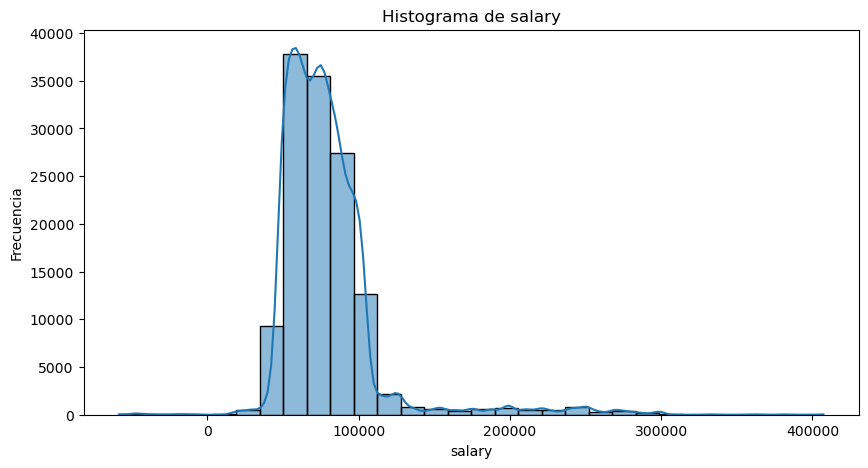

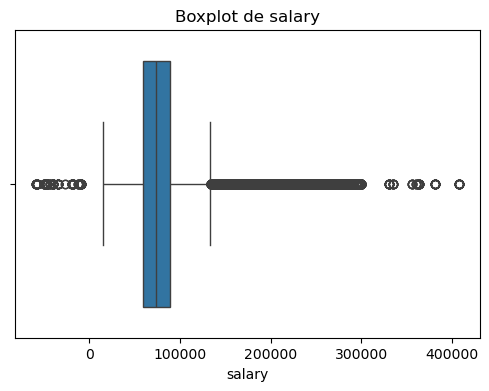

In [17]:
# Histograma de Salary
plt.figure(figsize=(10,5))
sns.histplot(df['salary'].dropna(), bins=30, kde=True)  # .dropna() para ignorar nulos
plt.title('Histograma de salary')
plt.xlabel('salary')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de Salary
plt.figure(figsize=(6,4))
sns.boxplot(x=df['salary'].dropna())
plt.title('Boxplot de salary')
plt.xlabel('salary')
plt.show()

Salary presenta muchos valores atípicos por lo que optaremos por reemplazar los nulos con métodos como KNNImputer e IterativeImputer.

Para imputar valores faltantes de la columna Salary con métodos como KNNImputer o IterativeImputer, lo ideal es usar columnas que estén correlacionadas o tengan relación lógica con el salario.
Columnas que vamos a utilizar para imputar salary (por su relación) : 'education', 'clv', 'points_accumulated', 'distance', 'flights_booked', 'total_flights', 'marital_status', 'loyalty_card', 'enrollment_year', 'enrollment_month')

In [18]:
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [19]:
# como vamos a crear columnas nuevas, vamos a hacer una copia del DataFrame usando el método 'copy()'
df_copia = df.copy()
df_copia.head(1)

,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8


In [20]:
from sklearn.preprocessing import OrdinalEncoder

In [21]:
# Seleccionamos columnas para imputación
columnas_utiles = [
    'salary', 'education', 'clv', 'points_accumulated', 'distance',
    'flights_booked', 'total_flights', 'marital_status',
    'loyalty_card', 'enrollment_year', 'enrollment_month'
]

# Creamos un DataFrame de trabajo
df_imputar = df_copia[columnas_utiles].copy()

# Codificamos las columnas categóricas
columnas_cat = ['education', 'marital_status', 'loyalty_card']
encoder = OrdinalEncoder()   # OrdinalEncoder transforma cada categoría en un número entero
df_imputar[columnas_cat] = encoder.fit_transform(df_imputar[columnas_cat])

In [22]:
# Iterative Imputer
iterative_imputer = IterativeImputer(max_iter=20, random_state=42)
iterative_result = iterative_imputer.fit_transform(df_imputar)

# Añadir la columna imputada al DataFrame copia
df_copia['salary_iterative'] = iterative_result[:, 0] #seleccionamos la columna con índice 0

# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_copia[['salary_iterative']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
salary_iterative    0
dtype: int64 nulos


In [ ]:
# hagamos ahora lo mismo con el KNNImputer. NOTA: puede tardar un ratito (5m 17s o incluso 7 m 57s)

# instanciamos la clase del KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
knn_result = knn_imputer.fit_transform(df_imputar)

# Añadir la columna imputada al DataFrame copia
df_copia['salary_knn'] = knn_result[:, 0] 

# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_copia[['salary_knn']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
salary_knn    0
dtype: int64 nulos


In [24]:
df_copia.describe()[['salary', 'salary_iterative', 'salary_knn']]

,salary,salary_iterative,salary_knn
count,131813.000000,176919.000000,176919.000000
mean,79508.221791,80499.312989,80121.597773
std,34912.117695,30208.401360,31938.989740
min,-58486.000000,-58486.000000,-58486.000000
25%,59386.000000,64100.000000,62207.000000
50%,73734.000000,80651.251793,74655.000000
75%,88897.000000,86182.000000,88885.800000
max,407228.000000,407228.000000,407228.000000


Nos quedamos con la columnaimputación KNN porque se acerca más a la media y la mediana

In [25]:
# Eliminamos las columnas que ya no interesan del df_copia: "salary", "salary_iterative"

df_copia = df_copia.drop(["salary", "salary_iterative" ], axis = 1)

# Cambiamos el nombre de las columnas que quedaron para que tengan el mismo nombre de origen

nuevo_nombre = {"salary_knn": "salary"}
df_copia = df_copia.rename(columns = nuevo_nombre)

In [26]:
# para continuar trabajando con el df que tiene el salary imputado
df = df_copia

In [27]:
df_copia.head(3)

,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,salary
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,92552.0
100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,52628.0
100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,70042.6


In [28]:
# verificamos que no quedan nulos
display(df.isnull().sum())

year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
country                        0
province                       0
city                           0
postal_code                    0
gender                         0
education                      0
marital_status                 0
loyalty_card                   0
clv                            0
enrollment_type                0
enrollment_year                0
enrollment_month               0
salary                         0
dtype: int64

### FIN de limpieza de nulos

Reemplazamos todos los valores únicos de las columnas a minúsculas y reemplazamos espacios por guión bajo

In [29]:
# Seleccionar columnas categóricas (tipo 'object')
cols_cat = df.select_dtypes(include='object').columns

# Limpiar valores: minúsculas y guiones bajos
for col in cols_cat:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [30]:
# Verificamos que se hayan realizado los cambios

for col in cols_cat:
    print(f"Valores únicos en '{col}':")
    print(df[col].unique())
    print("-----------------")

Valores únicos en 'country':
['canada']
-----------------
Valores únicos en 'province':
['alberta' 'ontario' 'british_columbia' 'quebec' 'manitoba'
 'new_brunswick' 'nova_scotia' 'saskatchewan' 'newfoundland' 'yukon'
 'prince_edward_island']
-----------------
Valores únicos en 'city':
['edmonton' 'toronto' 'dawson_creek' 'vancouver' 'montreal' 'tremblant'
 'quebec_city' 'ottawa' 'trenton' 'winnipeg' 'thunder_bay' 'fredericton'
 'halifax' 'sudbury' 'regina' 'peace_river' 'whistler' "st._john's"
 'kingston' 'victoria' 'banff' 'london' 'calgary' 'west_vancouver' 'hull'
 'kelowna' 'moncton' 'whitehorse' 'charlottetown']
-----------------
Valores únicos en 'postal_code':
['t9g_1w3' 'm1r_4k3' 'u5i_4f1' 'v5r_1w3' 'v6e_3d9' 'h2y_4r4' 'm8y_4k8'
 'h5y_2s9' 'g1b_3l5' 'k1f_2r2' 'k8v_4b2' 'r3r_3t4' 'p1w_1k4' 'k8t_5m5'
 'e3b_2h2' 'h2y_2w2' 'p5s_6r4' 'p2t_6g3' 'b3j_9s2' 'm5v_1g5' 'b3c_2m8'
 'm2z_4k1' 'h2t_2j6' 'r2c_0m5' 't3g_6y6' 's1j_3c5' 't9o_2w2' 'v6t_1y8'
 'v1e_4r6' 'm2m_7k8' 'a1c_6h9' 'm9k_2p4' 

In [ ]:
# revisamos los tipos de los datos con la función que creamos anteriormente
unicos(df)

Salary: hemos encontrado valores negativos

In [32]:
# Filtro df para mostrar solo las filas donde 'salary' es menor que 0
salarios_negativos = df[df['salary'] < 0]

# Contar cuántos salarios negativos hay
num_salarios_negativos = len(salarios_negativos)
print(f"\nNúmero total de salarios negativos: {num_salarios_negativos}")


Número total de salarios negativos: 180


In [33]:
# Aplica la función abs() a la columna 'salary'para dejar todos los datos en valores absolutos
df['salary'] = df['salary'].abs()

# Filtro df para mostrar solo las filas donde 'salary' es menor que 0
salarios_negativos_despues = df[df['salary'] < 0]

# Verifico cuántos salarios negativos hay después de la función
num_salarios_negativos = len(salarios_negativos_despues)
print(f"\nNúmero total de salarios negativos: {num_salarios_negativos}")



Número total de salarios negativos: 0


Salary: valoramos si mantenemos float o pasamos a int

In [34]:
# Verificar si salary tiene decimales no cero
decimales = (df['salary'] % 1 != 0).any()   # (a través del residuo podemos saber si tiene decimales)

if decimales:
    print("Hay decimales no cero. Mejor mantener salary como float.")
else:
    print("No hay decimales no cero. Puedes convertir salary a int si quieres.")

Hay decimales no cero. Mejor mantener salary como float.


In [35]:
# Dejamos todos los datos de salary con 2 decimales
df['salary'] = df['salary'].round(2)

Cambiamos 'points_accumulated', 'clv' a int64 (lo indicamos porque por defecto nos cambia a int32)

In [36]:
# cambio el tipo de dato de estas columnas a int

cols_a_entero = ['points_accumulated', 'clv']

for col in cols_a_entero:
    df[col] = df[col].astype('int64') 

In [37]:
df.dtypes

year                             int64
month                            int64
flights_booked                   int64
flights_with_companions          int64
total_flights                    int64
distance                         int64
points_accumulated               int64
points_redeemed                  int64
dollar_cost_points_redeemed      int64
country                         object
province                        object
city                            object
postal_code                     object
gender                          object
education                       object
marital_status                  object
loyalty_card                    object
clv                              int64
enrollment_type                 object
enrollment_year                  int64
enrollment_month                 int64
salary                         float64
dtype: object

Cambiamos 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card', 'enrollment_type' a string, object. (en dtype aparecían como int64 aunque en el df aparecían como object)

In [38]:
cols_a_string = ['country', 'province', 'city', 'postal_code',
    'gender', 'education', 'marital_status',
    'loyalty_card', 'enrollment_type']

df[cols_a_string] = df[cols_a_string].astype("string")

In [39]:
df.dtypes

year                                    int64
month                                   int64
flights_booked                          int64
flights_with_companions                 int64
total_flights                           int64
distance                                int64
points_accumulated                      int64
points_redeemed                         int64
dollar_cost_points_redeemed             int64
country                        string[python]
province                       string[python]
city                           string[python]
postal_code                    string[python]
gender                         string[python]
education                      string[python]
marital_status                 string[python]
loyalty_card                   string[python]
clv                                     int64
enrollment_type                string[python]
enrollment_year                         int64
enrollment_month                        int64
salary                            

# Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes
gráficas usando la mejor gráfica que consideres:

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [41]:
df.columns

Index(['year', 'month', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed', 'country', 'province', 'city',
       'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'salary'],
      dtype='object')

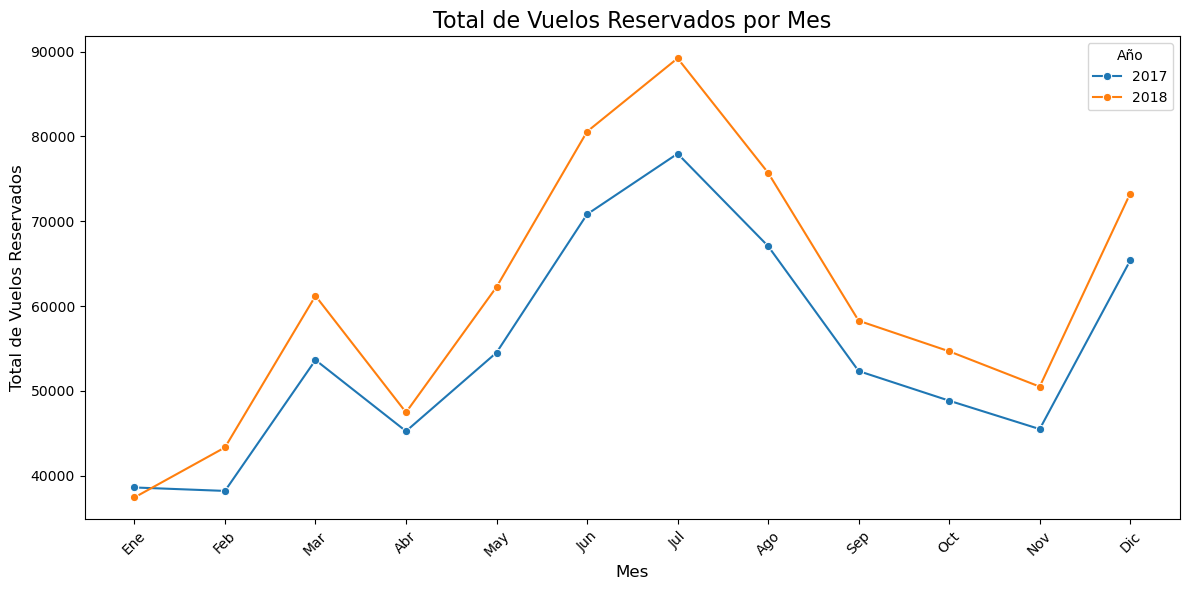

In [42]:
# Agrupamos por año y mes, y sumamos los vuelos reservados
monthly_flights = df.groupby(['year', 'month'])['flights_booked'].sum().reset_index()

# Creamos un gráfico de líneas para mostrar la evolución por mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_flights, x='month', y='flights_booked', hue='year', marker='o', palette='tab10')

# Títulos y etiquetas
plt.title('Total de Vuelos Reservados por Mes', fontsize=16)  #fontsize: tamaño de la fuente
plt.xlabel('Mes', fontsize=12) 
plt.ylabel('Total de Vuelos Reservados', fontsize=12)

# Personaliza las etiquetas del eje X para mostrar nombres de meses
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

plt.legend(title='Año')
plt.tight_layout() # Ajusta el diseño
plt.show()

### Respuesta:
Hay una estacionalidad clara con picos en Marzo, Julio y Diciembre, con el pico más alto o significativo en Julio.  
También se observa un crecimiento anual si comparamos los datos de 2017 con 2018.  
Se debería tener en cuenta los mínimos que presentan Enero, Febrero sin perder de vista Abril.


### 2 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [43]:
df.columns

Index(['year', 'month', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed', 'country', 'province', 'city',
       'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'salary'],
      dtype='object')

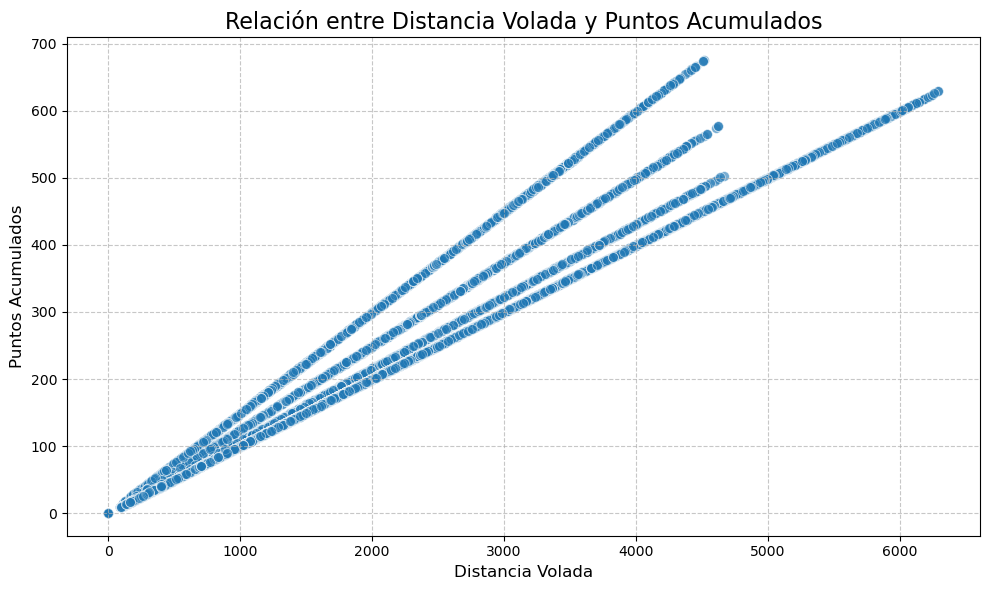

In [44]:
# Crear el gráfico de dispersión con los nombres de columna actualizados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='points_accumulated', data=df, alpha=0.6, s=50) #alpha: transparecia #s: tamaño del marcador

plt.title('Relación entre Distancia Volada y Puntos Acumulados', fontsize=16)
plt.xlabel('Distancia Volada', fontsize=12)
plt.ylabel('Puntos Acumulados', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) # Una cuadrícula aquí puede ser útil
plt.tight_layout() # ajustamos
plt.show()

### Respuesta:
Hay una fuerte relación lineal positiva entre la distancia volada y los puntos acumulados.  
Parece que habría 4 tipos de cliente ya que hay 4 líneas diferenciadas. Podríamos entender que se otrogan puntos diferentes según la distancia volada según el tipo de cliente que seas: Gold, Premium, Standard...

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [45]:
df.columns

Index(['year', 'month', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed', 'country', 'province', 'city',
       'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'salary'],
      dtype='object')

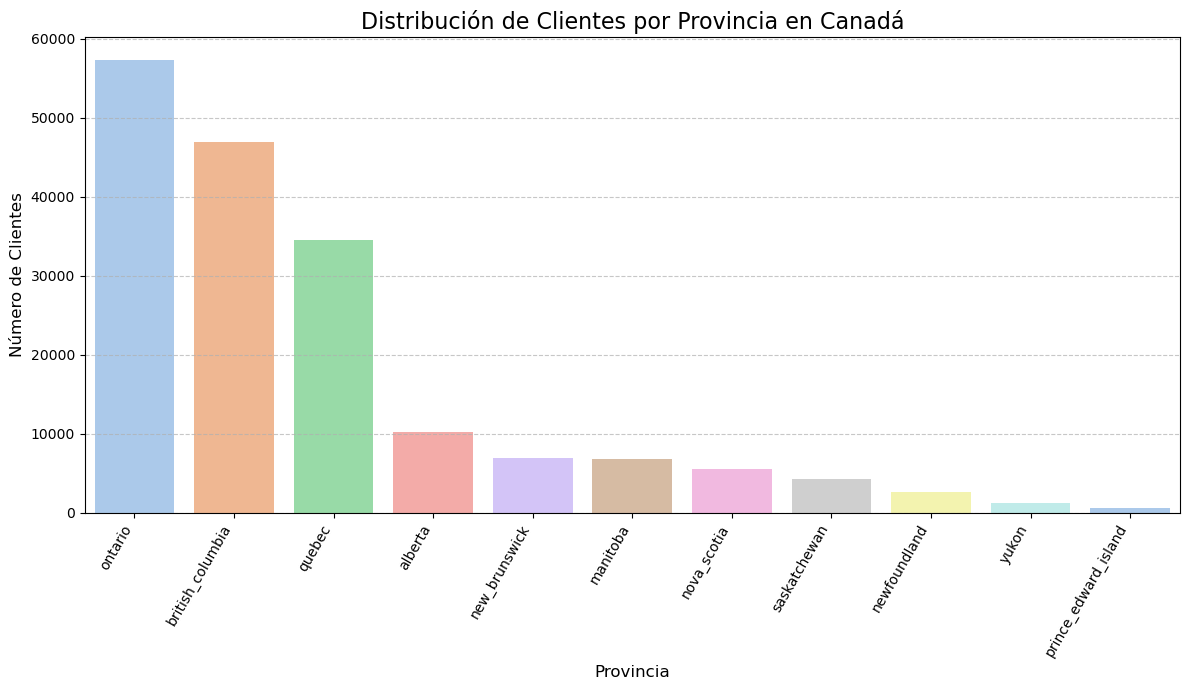

Distribución de Clientes por Provincia:
               Provincia  Numero_de_Clientes
0                ontario               57303
1       british_columbia               46866
2                 quebec               34523
3                alberta               10178
4          new_brunswick                6899
5               manitoba                6786
6            nova_scotia                5527
7           saskatchewan                4294
8           newfoundland                2661
9                  yukon                1245
10  prince_edward_island                 637


In [46]:
# Contar la frecuencia de clientes por cada provincia
distribucion_provincias = df['province'].value_counts().reset_index()
distribucion_provincias.columns = ['Provincia', 'Numero_de_Clientes'] # Renombramos las columnas

# Creamos el gráfico de barras con la corrección para el FutureWarning
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Provincia',
    y='Numero_de_Clientes',
    data=distribucion_provincias,
    palette='pastel',
    hue='Provincia',  # ASIGNAMOS 'Provincia' a 'hue'
    legend=False      # ESTABLECEMOS legend=False   # esto para que no salga el warning de seaborn de que no se va a poder usar la paleta si no se da un hue
)

plt.title('Distribución de Clientes por Provincia en Canadá', fontsize=16)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # ajustamos
plt.show()

print("Distribución de Clientes por Provincia:")
print(distribucion_provincias)

Opción 2 de gráfico: introduzco nuevos conceptos con ayuda la IA

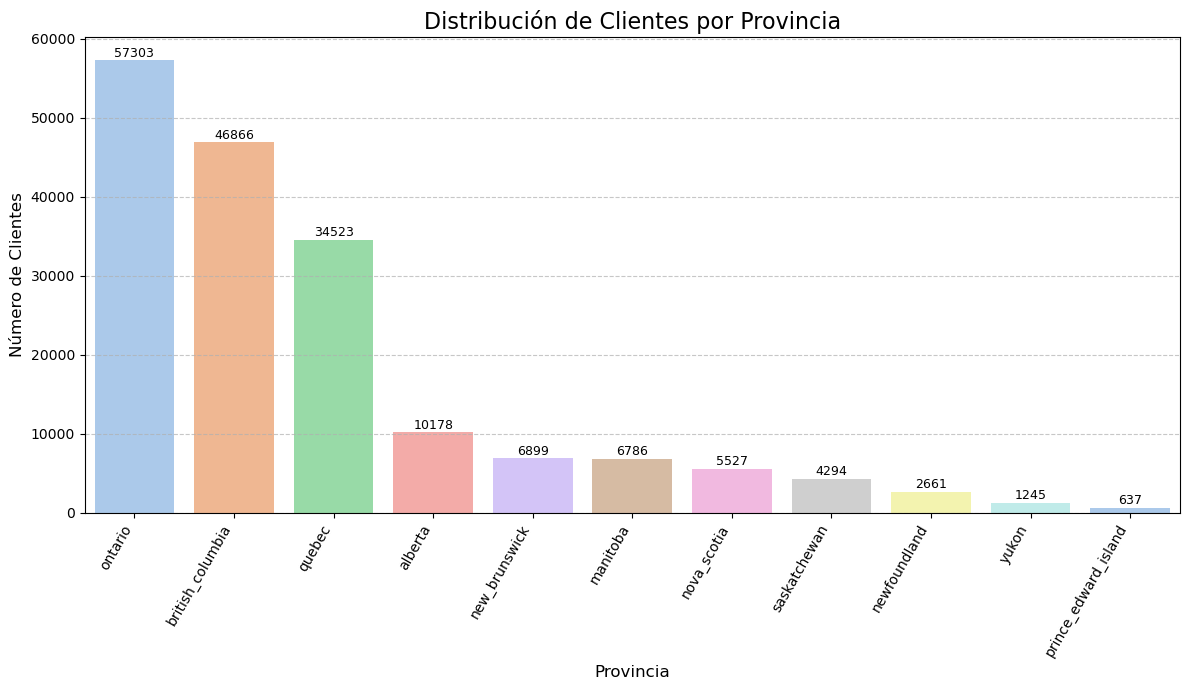

In [47]:
# Contar la frecuencia de clientes por cada provincia
distribucion_provincias = df['province'].value_counts().reset_index() # convierte el índice actual en una columna regular
distribucion_provincias.columns = ['Provincia', 'Numero_de_Clientes'] # Renombramos las columnas para mayor claridad

# Creamos la figura y los ejes para poder manipular las barras
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='Provincia',
    y='Numero_de_Clientes',
    data=distribucion_provincias,
    palette='pastel',
    hue='Provincia', # Mantenemos esto para evitar el FutureWarning, aunque la leyenda no sea visible
    legend=False     # No queremos mostrar la leyenda
)

# Añadir los números encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', # Formatea el número sin decimales
                (p.get_x() + p.get_width() / 2., p.get_height()), # Posición X, Y
                ha='center', va='center', # Alineación horizontal y vertical
                xytext=(0, 5), # Pequeño desplazamiento vertical para que el número no toque la barra
                textcoords='offset points', # Coordenadas relativas al texto
                fontsize=9, # Tamaño de la fuente del número
                color='black') # Color del texto

plt.title('Distribución de Clientes por Provincia', fontsize=16)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=60, ha='right') # Alineación a la derecha para que los nombres largos queden bien
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Respuesta:
Ontorio, British Columbia y Quebec son las provincias con mayor números de clientes.  
Si juntamos las 2 o 3 provincias con mayor número de clientes, representan juntas una porción muy significtaiva de la base de los clientes.

### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [48]:
df.columns

Index(['year', 'month', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed', 'country', 'province', 'city',
       'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'salary'],
      dtype='object')

In [49]:
df['education'].unique()

<StringArray>
['bachelor', 'college', 'master', 'doctor', 'high_school_or_below']
Length: 5, dtype: string

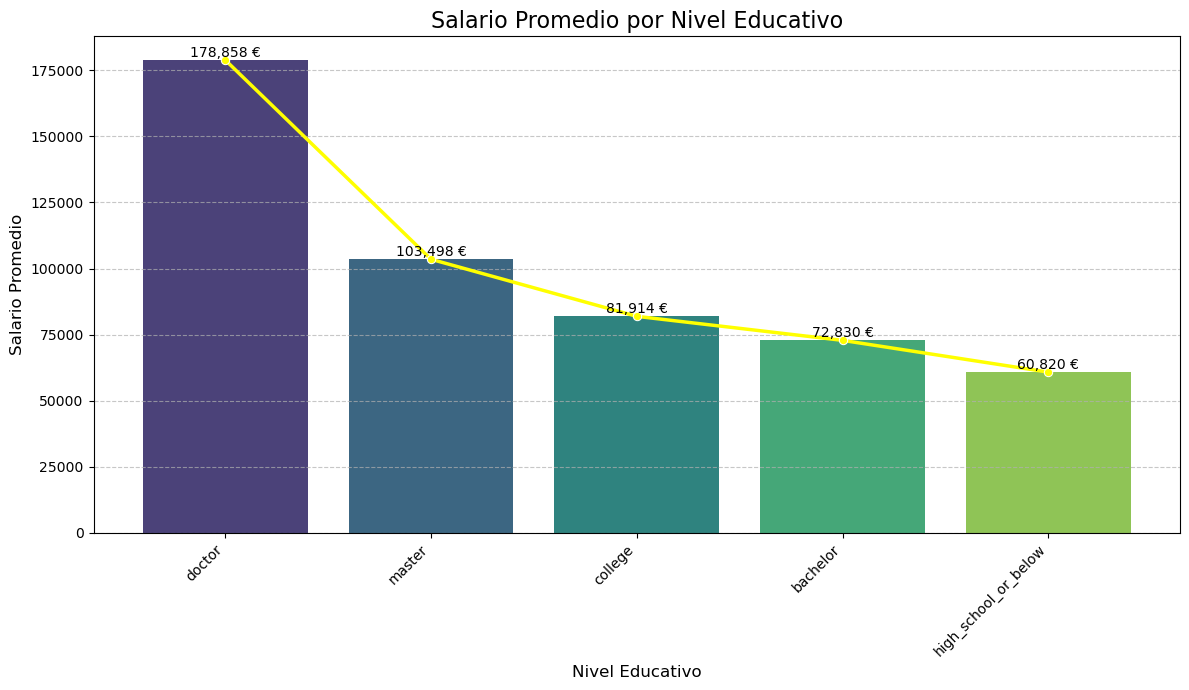

In [50]:

# Definir el orden deseado para los niveles educativos
orden_educacion = ['doctor', 'master', 'college', 'bachelor', 'high_school_or_below']

# Convertir la columna 'education' a tipo categórico con el orden especificado
df['education'] = pd.Categorical(df['education'], categories=orden_educacion, ordered=True)

# Calcular el salario promedio para cada nivel educativo
# Al haber convertido 'education' a categórico ordenado, el groupby mantendrá este orden
salario_por_educacion = df.groupby('education', observed=False)['salary'].mean().reset_index() # observed=False lo añadimos para evitar el warning de aviso. En el ffuturo será True por defecto. Con False me enseña todas las categorías que tengo (incluso si alguna no tuviera clientes)


# 4. Crear el gráfico de barras
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='education',
    y='salary',
    data=salario_por_educacion,
    palette='viridis', 
    hue='education',     # Para evitar el FutureWarning y colorear cada barra
    legend=False         # No necesitamos leyenda para esto
)

# Añadir los valores del salario promedio encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f} €', # Formatea el número sin decimales y con separador de miles, añade '€'
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), # Desplazamiento vertical
                textcoords='offset points',
                fontsize=10,
                color='black')

sns.lineplot(
    x='education',
    y='salary',
    data=salario_por_educacion,
    marker='o',
    color='yellow',
    linewidth=2.5,
    ax=ax  
)

plt.title('Salario Promedio por Nivel Educativo', fontsize=16)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Salario Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right') # Ajusta la rotación de las etiquetas con rotation
plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula en el eje Y
plt.tight_layout() # Ajustar el diseño
plt.show()


### Respuesta:
Hay una relación lineal positiva fuerte entre el salario promedio de los clientes y su nivel educativo.  
Presenta una brecha salarial significativa en los niveles superiores, principalmente con 'doctor'.

### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [51]:
df.columns

Index(['year', 'month', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed', 'country', 'province', 'city',
       'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'salary'],
      dtype='object')

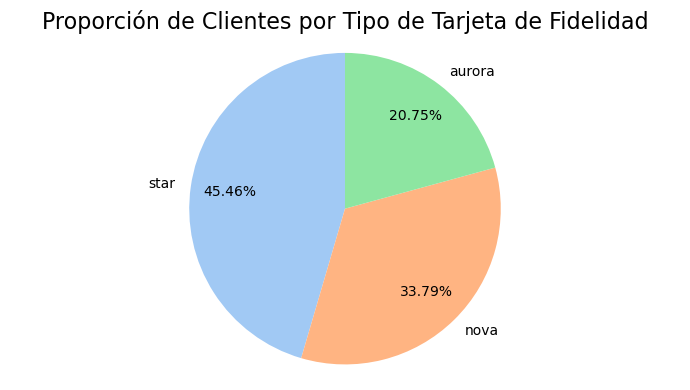

In [52]:
# Contar la frecuencia de cada tipo de tarjeta de fidelidad
conteo_tarjetas = df['loyalty_card'].value_counts()

# Calcular las proporciones (porcentajes)
proporciones_tarjetas = conteo_tarjetas / conteo_tarjetas.sum() * 100

# Convertir a DataFrame para facilitar el manejo
df_proporciones = proporciones_tarjetas.reset_index() # convierte el índice actual en una columna regular
df_proporciones.columns = ['Tipo_Tarjeta', 'Porcentaje_Clientes']


# Crear Pie chart
plt.figure(figsize=(7, 4)) 

wedges, texts, autotexts = plt.pie(
    df_proporciones['Porcentaje_Clientes'],
    labels=df_proporciones['Tipo_Tarjeta'],
    autopct='%1.2f%%', # formatea los porcentajes en las porciones
    pctdistance=0.75, # Un poco más cerca del centro para un pie chart
    startangle=90,  # para que la primera porción empiece en la parte superior
    colors=sns.color_palette('pastel', n_colors=len(df_proporciones)),
)


plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad', fontsize=16)
plt.axis('equal') # Asegura que el círculo sea un círculo perfecto
plt.tight_layout()
plt.show()


### Respuesta:
La myoría de clientes poseen la tipo Star, seguido de cerca de Nova.

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [53]:
df.columns

Index(['year', 'month', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed', 'country', 'province', 'city',
       'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'salary'],
      dtype='object')

Tabla de Contingencia (Crosstab):
gender          female   male
marital_status               
divorced         13078  13342
married          51312  51617
single           23985  23585


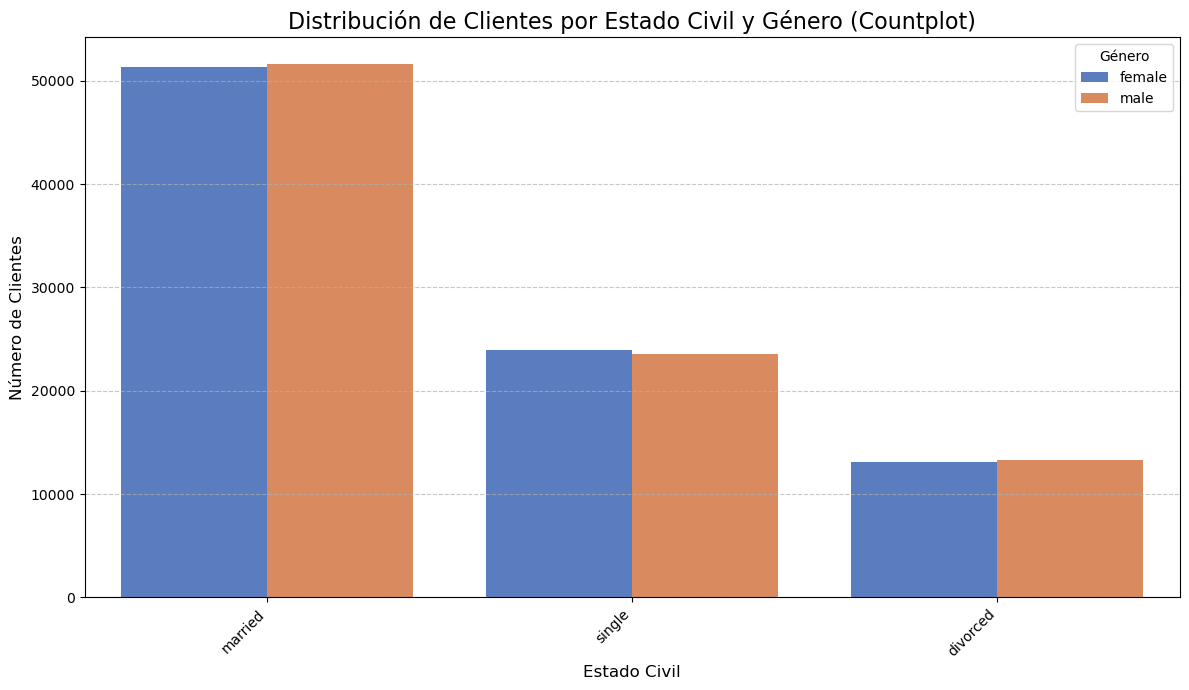

In [54]:
# Crear la tabla de contingencia (crosstab)
# pd.crosstab cuenta las ocurrencias de cada combinación de las dos columnas
conteo_crosstab = pd.crosstab(df['marital_status'], df['gender'])

print("Tabla de Contingencia (Crosstab):")
print(conteo_crosstab)

# Gráfico de Barras Agrupadas con sns.countplot()
plt.figure(figsize=(12, 7))

sns.countplot(
    x='marital_status',
    hue='gender',        
    data=df,             
    palette='muted'
)

plt.title('Distribución de Clientes por Estado Civil y Género (Countplot)', fontsize=16)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### Respuesta:
Hay una distribución de género muy equilibrada en todos los estados civiles.  
Married es el grupo más grande y Divorced el más pequeño.  
Distribución de clientes por género muy equilibrada.

# BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberás seguir son:  

1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada grupo.

3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

### 1. Preparación de Datos: 
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [55]:
df.columns

Index(['year', 'month', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed', 'country', 'province', 'city',
       'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'salary'],
      dtype='object')

In [56]:
# Filtrar columnas: crear nuevo df

df_vuelos_educacion = df[['flights_booked', 'education']].copy()
display(df_vuelos_educacion.head())

print(df_vuelos_educacion.info())

,flights_booked,education
Loyalty Number,,
100018,3,bachelor
100102,10,college
100140,6,college
100214,0,bachelor
100428,6,bachelor


<class 'pandas.core.frame.DataFrame'>
Index: 176919 entries, 100018 to 999940
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   flights_booked  176919 non-null  int64   
 1   education       176919 non-null  category
dtypes: category(1), int64(1)
memory usage: 2.9 MB
None


### 2. Análisis Descriptivo:  
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada grupo.

In [57]:
# Agrupar por nivel educativo y calcular estadísticas descriptivas
estadisticas_por_educacion = df_vuelos_educacion.groupby('education', observed=False)['flights_booked'].describe()

display(estadisticas_por_educacion)

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
doctor,7775.0,7.886045,4.731986,1.0,4.0,7.0,11.0,21.0
master,5519.0,7.826599,4.651288,1.0,4.0,7.0,11.0,21.0
college,45106.0,7.912318,4.695004,0.0,4.0,8.0,11.0,21.0
bachelor,110177.0,7.853871,4.699915,0.0,4.0,7.0,11.0,21.0
high_school_or_below,8342.0,7.811796,4.703415,1.0,4.0,7.0,11.0,21.0


In [58]:
# Agrupar por nivel educativo y calcular estadísticas descriptivas
estadisticas_por_educacion = df_vuelos_educacion.groupby('education', observed=False)['flights_booked'].describe()

print(estadisticas_por_educacion)

                         count      mean       std  min  25%  50%   75%   max
education                                                                    
doctor                  7775.0  7.886045  4.731986  1.0  4.0  7.0  11.0  21.0
master                  5519.0  7.826599  4.651288  1.0  4.0  7.0  11.0  21.0
college                45106.0  7.912318  4.695004  0.0  4.0  8.0  11.0  21.0
bachelor              110177.0  7.853871  4.699915  0.0  4.0  7.0  11.0  21.0
high_school_or_below    8342.0  7.811796  4.703415  1.0  4.0  7.0  11.0  21.0


- Bachelor es el grupo que más reservas realiza, con una clara diferencia sobre el resto. Representa la mayor proporción de la base de clientes.  
- No obstante, todos los grupos presentan una media similar por lo que el nivel educativo no sería un preditcor fuerte para el número de vuelos que reserva una persona. A pesar de las grandes diferencias en el tamaño de los grupos, el comportamiento de reserva de vuelos por cliente es bastante homogéneo. 
- La desviación estándar es bastante alta en todos los grupos tnienedo en cuenta que la media es algo más de 7 por lo que hay bastante disperisón en el númeor d evuelo reservados. No obstante, la dispersión es similar para todos los grupos.  
- Los cuantiles, mínimos y máximos también son casi idénticos por grupos. 

### 3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [59]:
# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
import itertools

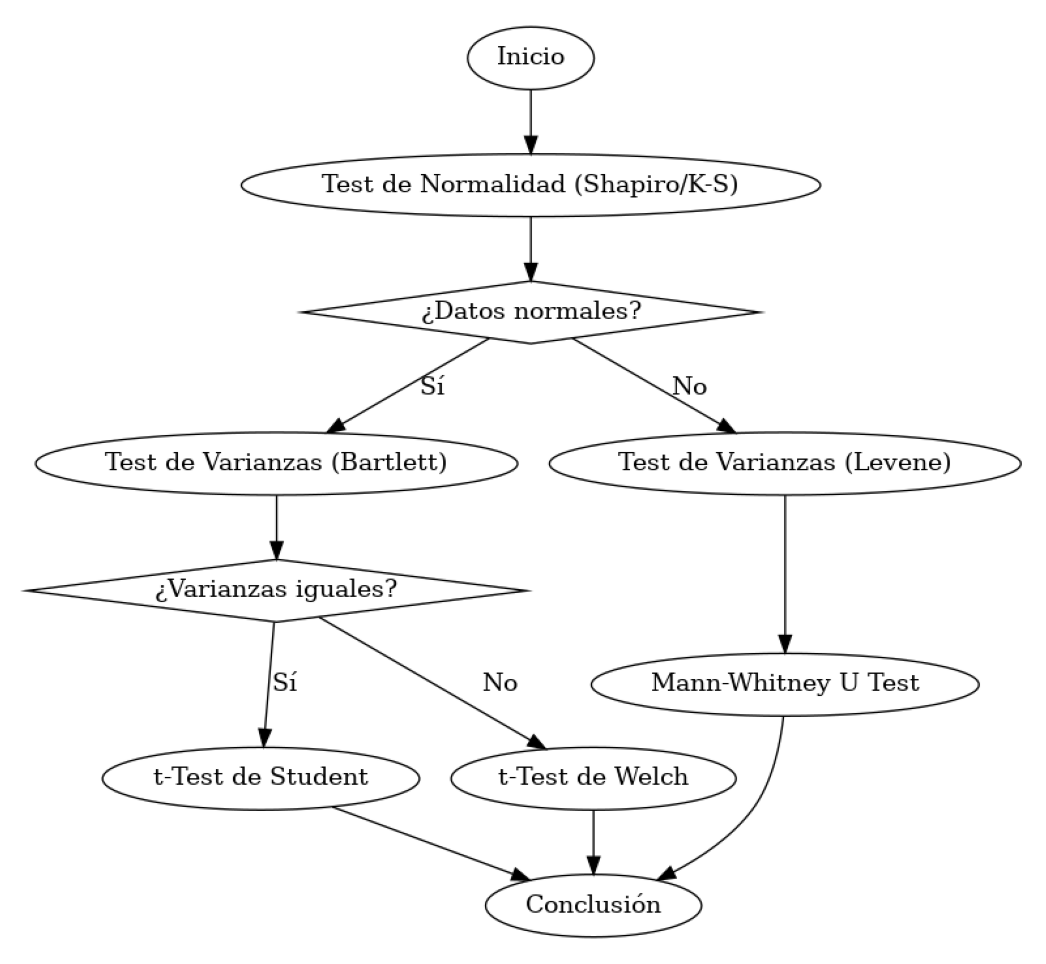

In [60]:
from IPython.display import Image

# Ruta al archivo de la imagen usando DOBLE BARRA INVERTIDA para evitar el error de escape.
image_file_path = "C:\\Users\\PC\\Documents\\14. Promo 52\\Módulos Visual Code\\3. Módulo 3\\Examen_final\\output.png"

# Muestra la imagen con el ancho especificado.
Image(filename=image_file_path, width=600, unconfined=True)

In [61]:
# Superfunción con todo el proceso de la imagen

def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Parámetros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50: #aquí vamos a decidir hacer komogorov porque es más potente y shapiro solo en muestras pequeñas
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales, all() solo devuelve True si todos los elementos son True

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")


In [62]:
df.columns

Index(['year', 'month', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed', 'country', 'province', 'city',
       'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'salary'],
      dtype='object')

In [63]:
import pandas as pd
from itertools import combinations

In [65]:
# Suponiendo que tu DataFrame se llama df
niveles = df['education'].dropna().unique()

# Comparar cada par de niveles educativos
for a, b in combinations(niveles, 2):
    grupo1 = df[df['education'] == a]['flights_booked'].dropna()
    grupo2 = df[df['education'] == b]['flights_booked'].dropna()

    print(f"📚 Comparando: {a} vs {b}")
    prueba_hipotesis(grupo1, grupo2)

📚 Comparando: bachelor vs college

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.7380)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 2465752573.0000, p-valor: 0.0172
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas)

📚 Comparando: bachelor vs master

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.1573)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 304667478.5000, p-valor: 0.7930
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)

📚 Comparando: bachelor vs doctor

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.4653)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 427005230.0000, p-valor: 0.6515
🔍 Conclusión: No se rechaza H0. Es decir, no ha

Sólo entre bachelor y college hay diferencias significativas. Quizá los hábitos o recursos para viajar sean distintos en estos grupos.  
Esto sugiere que el nivel educativo no afecta significativamente la cantidad de vuelos reservados, salvo entre bachelor y college.